# XEFI
### An example of generating a basic XEFI for a mutlilayer interface.

In [1]:
import XEFI
import kkcalc as kk
import numpy as np

In [2]:
refractive_db = kk.models.asp_db_complex
# refractive_air = refractive_db("N2")
refractive_air = 1.0 + 0j
refractive_P3HT = refractive_db("C10H14S", density = 1.33, name="P3HT") 
refractive_PS = refractive_db("C8H8", density = 1.05, name="PS")
refractive_Si = refractive_db("Si", density = 2.329, name="Si")

C:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\models\common.py:402: UserWarning: Setting a formula mass will not be internally used when a `stoichiometry` has been assigned.
  warnings.warn(
C:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\models\polynomials.py:1912: UserWarning: When generating `asp_complex`, the energy intervals of real (10.00, 30000.00) and imaginary (10.00, 500000.00) components don't match.
  warnings.warn(
C:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\models\polynomials.py:1931: UserWarning: Real energies are a subset of imaginary energies, truncating imaginary energies to match real.
  warnings.warn(
C:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\models\polynomials.py:624: UserWarning: (ASP 'P3HT'(511 en segments, 5 coefficients.)) Energies have changed length. Coefficients set to `None`.
  warnings.warn(
C:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\mo

In [3]:
# Define some system parameters
beam_energy = (XEFI.models.basic.en2wav) / 1.54  # in eV
print(f"{beam_energy:0.2f} eV")
beam_energy = 8050.92
# beam_energy = 2450  # in eV
angles = np.linspace(0.1, 0.8, 3000)  # in degrees

z = [
    0,
    # -600,
    -800,
    # -900,
    # -1200,
] # Define the z-coordinates for the multilayer interface

refractive_indicies: list[kk.models.asp_complex] = [
    refractive_air,
    refractive_PS,
    # refractive_P3HT,
    refractive_Si,
    # refractive_Si,
] #  
labels = ["Air"] + [
    ref.name
    for ref in refractive_indicies[1:]
]

8050.92 eV


wave layer 0	 [0.00720403+0.j]
wave layer 1	 [9.94352616e-06+0.00829665j]
wave layer 2	 [0.00020283+0.01415391j]


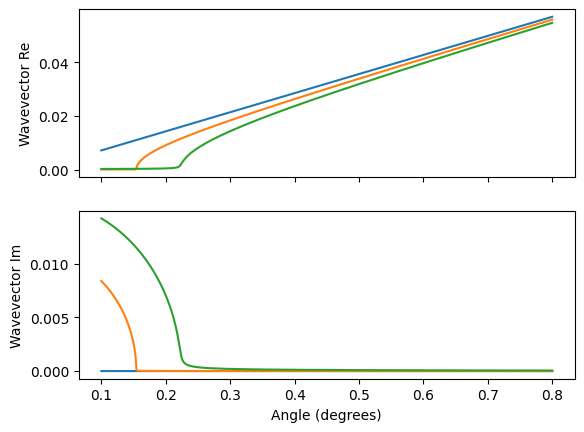

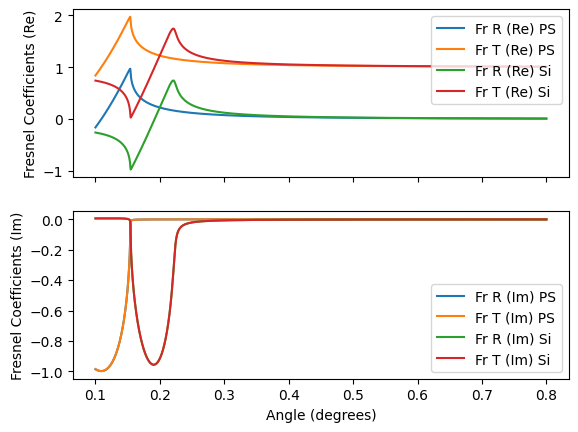

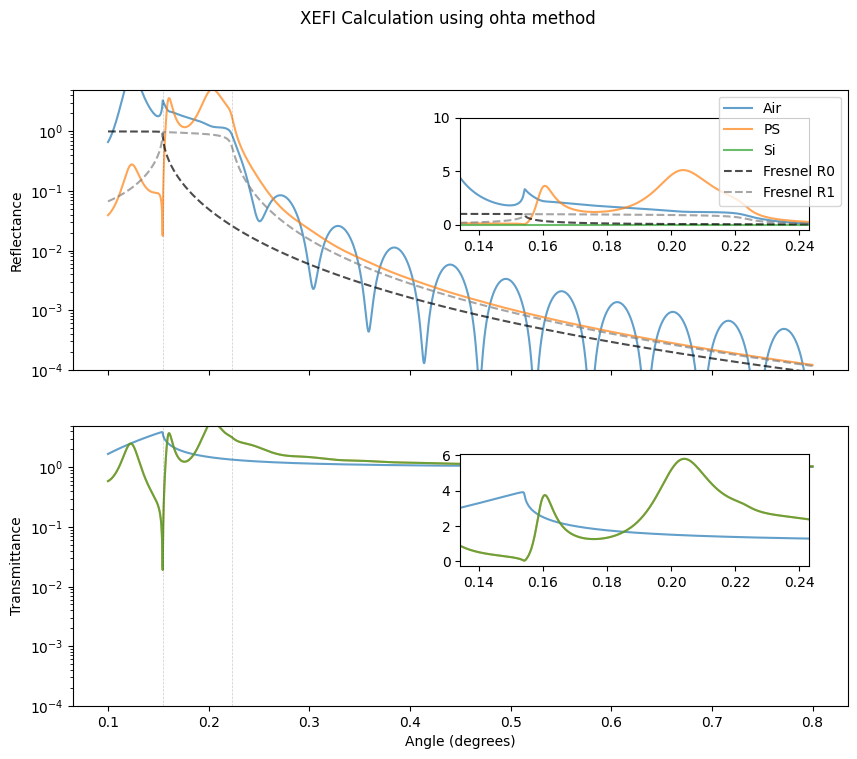

In [4]:
result = XEFI.XEF(
    energies=beam_energy,
    angles=angles,
    z=z,
    refractive_indices=refractive_indicies,
    # z_roughness=[10, 10, 10],
    layer_names=labels,
    method=XEFI.XEF_method.ohta
    # method=XEFI.XEF_method.dev
    # method=XEFI.XEF_method.tolan
)

The Expected Result from Toland for 800 Angstrom, Copper-Kalpha wavelength (~8keV).
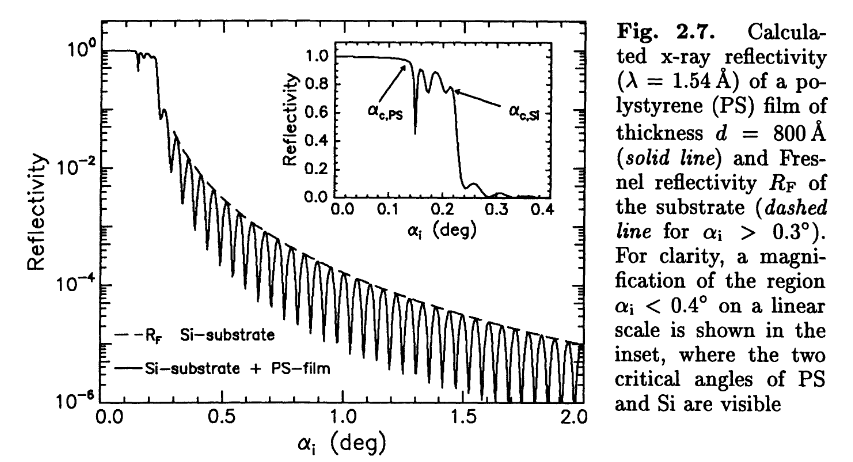

wave layer 0	 [0.00720403+0.j]
wave layer 1	 [9.94352616e-06+0.00829665j]
wave layer 2	 [0.00020283+0.01415391j]


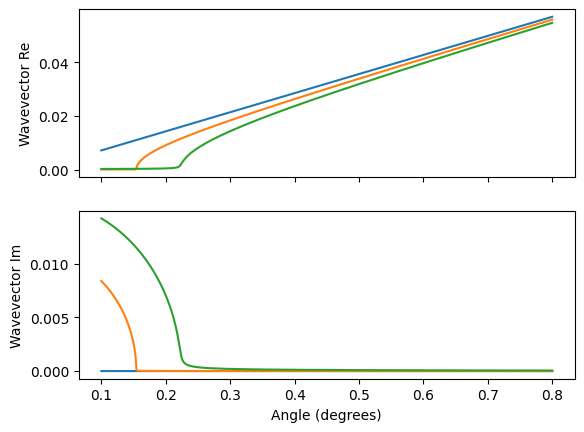

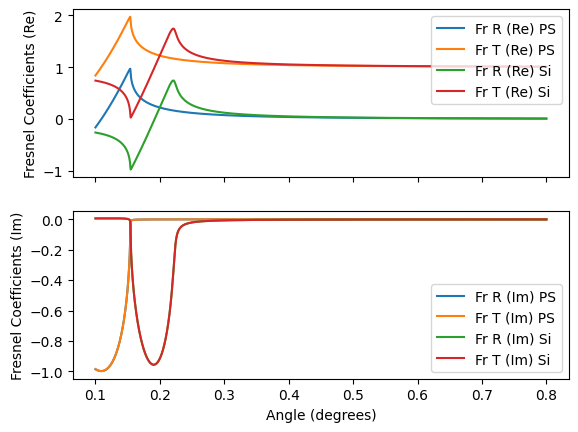

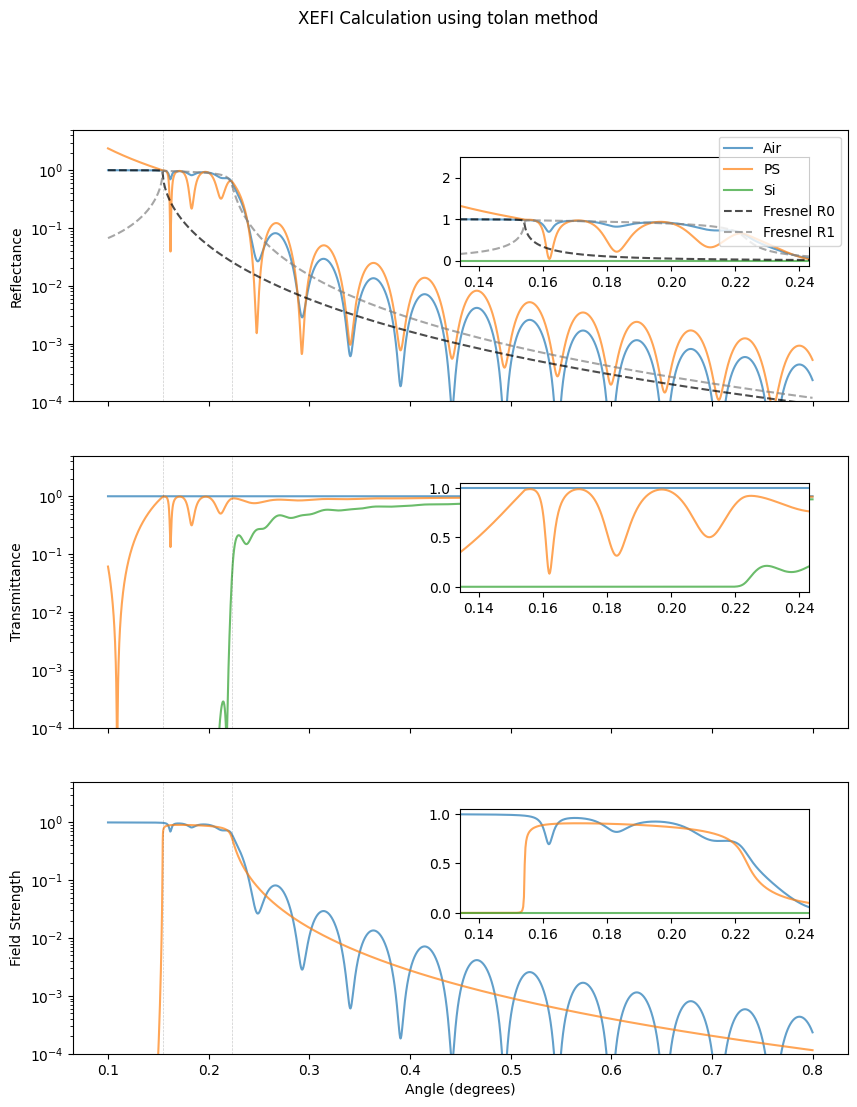

In [5]:
result2 = XEFI.XEF(
    energies=beam_energy,
    angles=angles,
    z=z,
    refractive_indices=refractive_indicies,
    layer_names=labels,
    # method=XEFI.XEF_method.dev
    method=XEFI.XEF_method.tolan
)

wave layer 0	 [0.00720403+0.j]
wave layer 1	 [9.94352616e-06+0.00829665j]
wave layer 2	 [0.00020283+0.01415391j]


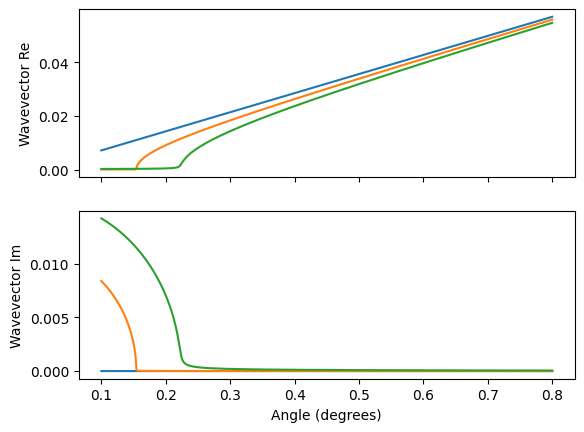

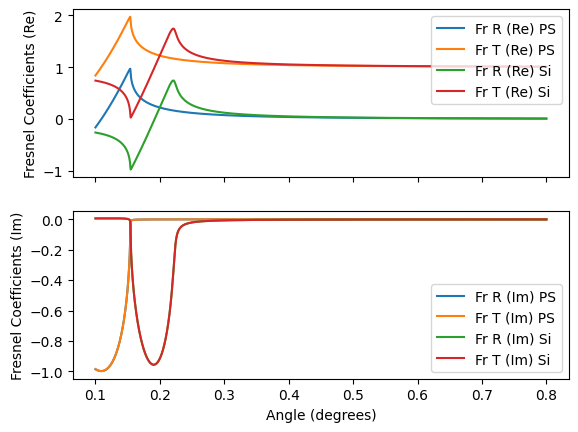

Layer 1: X = [-0.26095398+0.00611857j], 	 a_jp1 = [0.+0.j], 
	 fresnel_r = [-0.26095398+0.00611857j] 	 djp1 = 0
	wave = [0.00020283+0.01415391j]
Layer 0: X = [-0.14011594-0.98893732j], 	 a_jp1 = [0.00131049+1.04249535e-05j], 
	 fresnel_r = [-0.14011506-0.98893745j] 	 djp1 = 800.0
	wave = [9.94352616e-06+0.00829665j]
------
Layer 0: T = [1.+0.j], 	 a_jp1 = [0.00131049+1.04249535e-05j],
	 fresnel_t = [0.85988494-0.98893745j] 	 djp1 = 800.0
Layer 0: R = [-0.14011594-0.98893732j], 	 a_jp1 = [0.00131049+1.04249535e-05j],
	 fresnel_r = [-0.14011506-0.98893745j] 	 djp1 = 800.0
Layer 1: T = [0.85988445-0.98893777j], 	 a_jp1 = [0.],
	 fresnel_t = [0.73904602+0.00611857j] 	 djp1 = 0.0
Layer 1: R = [-3.82145393e-07+4.46243499e-07j], 	 a_jp1 = [0.],
	 fresnel_r = [-0.26095398+0.00611857j] 	 djp1 = 0.0


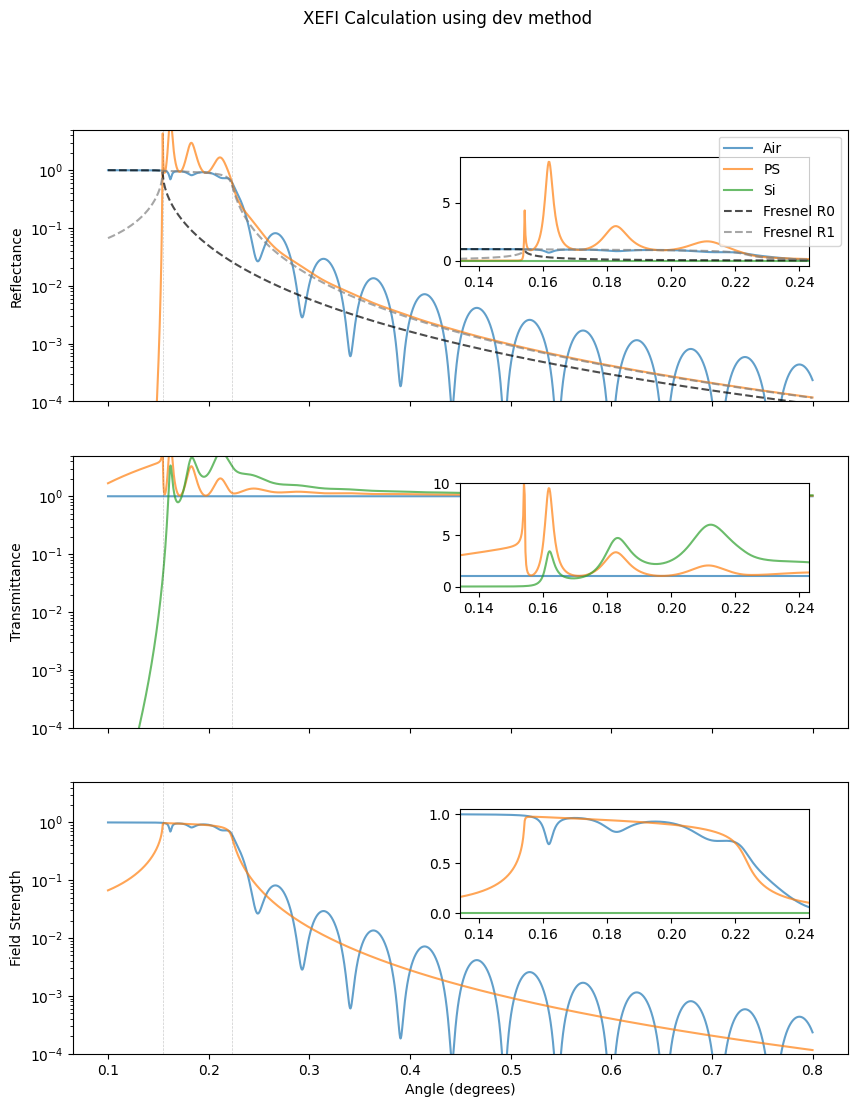

In [6]:
result3 = XEFI.XEF(
    energies=beam_energy,
    angles=angles,
    z=z,
    refractive_indices=refractive_indicies,
    layer_names=labels,
    # method=XEFI.XEF_method.dev
    method=XEFI.XEF_method.dev
)

T (3000, 3)
R (3000, 3)
(3000,)
complex128 float64
complex128
i:  0 
Transmission: [0.84439281-0.98236702j 0.84832728-0.98296475j 0.85227082-0.98354777j ...
 1.0089    +0.03449813j 1.00889401+0.03450801j 1.00888803+0.0345179j ] 
Reflection: [-0.77032883-2.63031226e-01j -0.77775457-2.60064593e-01j
 -0.78541592-2.57226067e-01j ... -0.00125176+6.58645947e-04j
 -0.00127348+3.70204814e-04j -0.00128751+8.16217333e-05j] 
Wave: [0.00712092+0.j 0.00713754+0.j 0.00715416+0.j ... 0.05693231+0.j
 0.05694893+0.j 0.05696555+0.j] 
d: [200.         175.97597598 151.95195195 127.92792793 103.9039039
  79.87987988  55.85585586  31.83183183   7.80780781] 
Phase: [[0.+1.42418427e+00j 0.+1.41563061e+00j 0.+1.40707695e+00j ...
  0.+2.13841481e-02j 0.+1.28304889e-02j 0.+4.27682963e-03j]
 [0.+1.42750847e+00j 0.+1.41893484e+00j 0.+1.41036122e+00j ...
  0.+2.14340611e-02j 0.+1.28604366e-02j 0.+4.28681222e-03j]
 [0.+1.43083267e+00j 0.+1.42223908e+00j 0.+1.41364549e+00j ...
  0.+2.14839740e-02j 0.+1.28903844e-02j

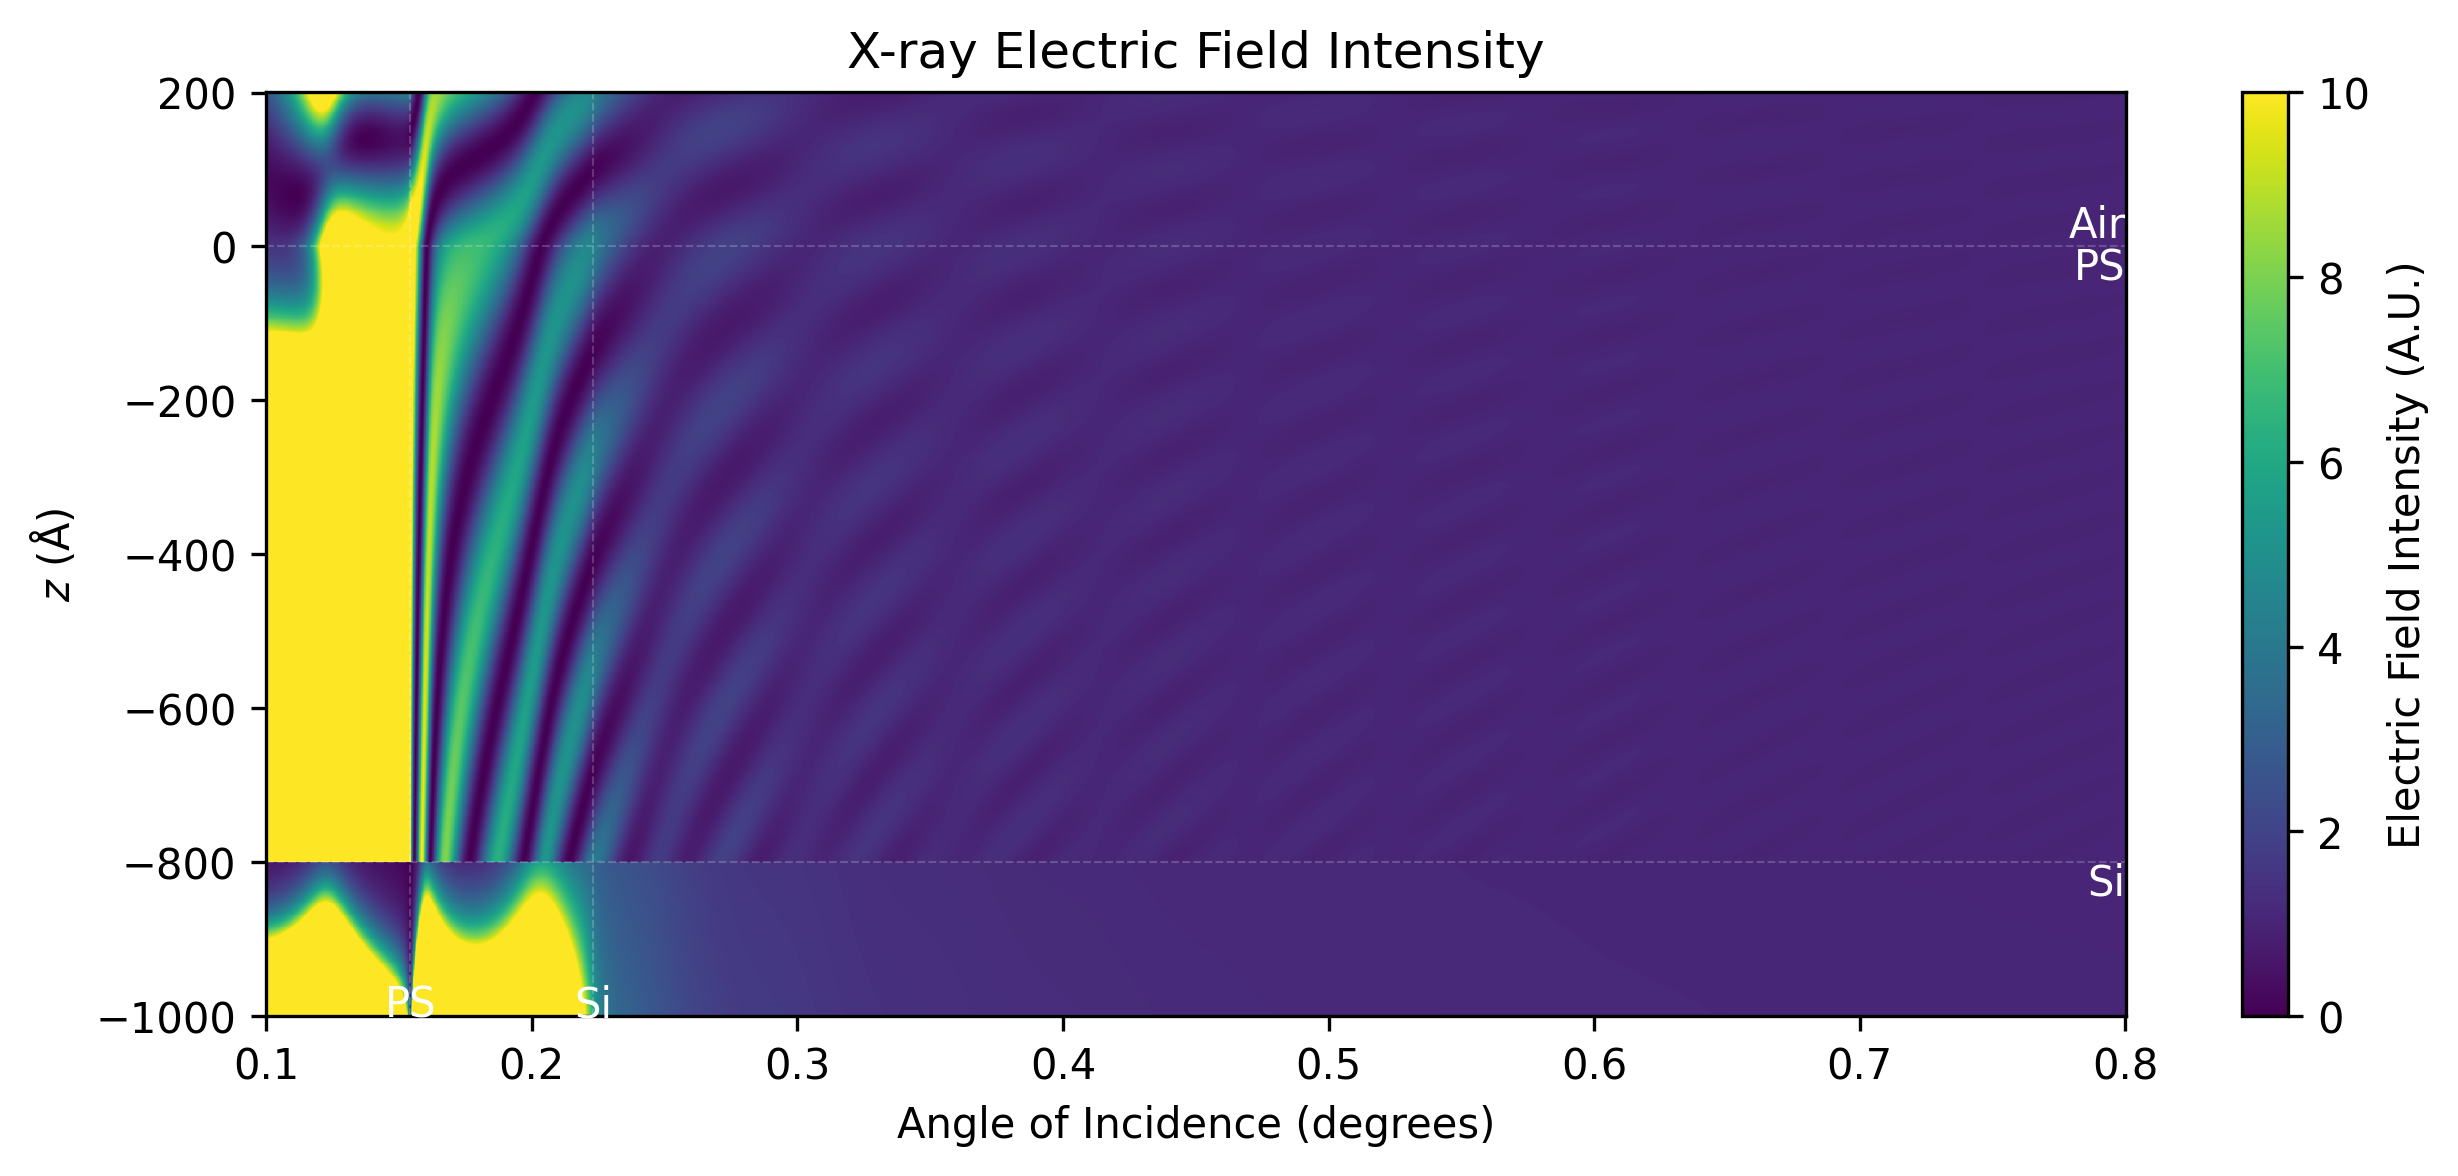

In [7]:
z_vals = np.linspace(200, -1000, 1000)
import matplotlib.colors as mc
# norm = mc.LogNorm(vmin=1e-6, vmax=10)
norm = mc.Normalize(vmin=0, vmax=10)
fig,ax = result.generate_pretty_figure_XEFI(z_vals, norm=norm)

T (3000, 3)
R (3000, 3)
(3000,)
complex128 float64
complex128
i:  0 
Transmission: [0.99999085+0.00427682j 0.99999081+0.0042868j  0.99999077+0.00429678j ...
 0.99941546+0.03418692j 0.99941512+0.03419689j 0.99941477+0.03420687j] 
Reflection: [-0.16403243-0.98527669j -0.16012296-0.98591484j -0.15620433-0.98653851j
 ...  0.01197414+0.0101122j   0.01168317+0.01016946j
  0.01139093+0.01021894j] 
Wave: [0.00712092+0.j 0.00713754+0.j 0.00715416+0.j ... 0.05693231+0.j
 0.05694893+0.j 0.05696555+0.j] 
d: [200.         175.97597598 151.95195195 127.92792793 103.9039039
  79.87987988  55.85585586  31.83183183   7.80780781] 
Phase: [[0.+1.42418427e+00j 0.+1.41563061e+00j 0.+1.40707695e+00j ...
  0.+2.13841481e-02j 0.+1.28304889e-02j 0.+4.27682963e-03j]
 [0.+1.42750847e+00j 0.+1.41893484e+00j 0.+1.41036122e+00j ...
  0.+2.14340611e-02j 0.+1.28604366e-02j 0.+4.28681222e-03j]
 [0.+1.43083267e+00j 0.+1.42223908e+00j 0.+1.41364549e+00j ...
  0.+2.14839740e-02j 0.+1.28903844e-02j 0.+4.29679480e-03j]
 ..

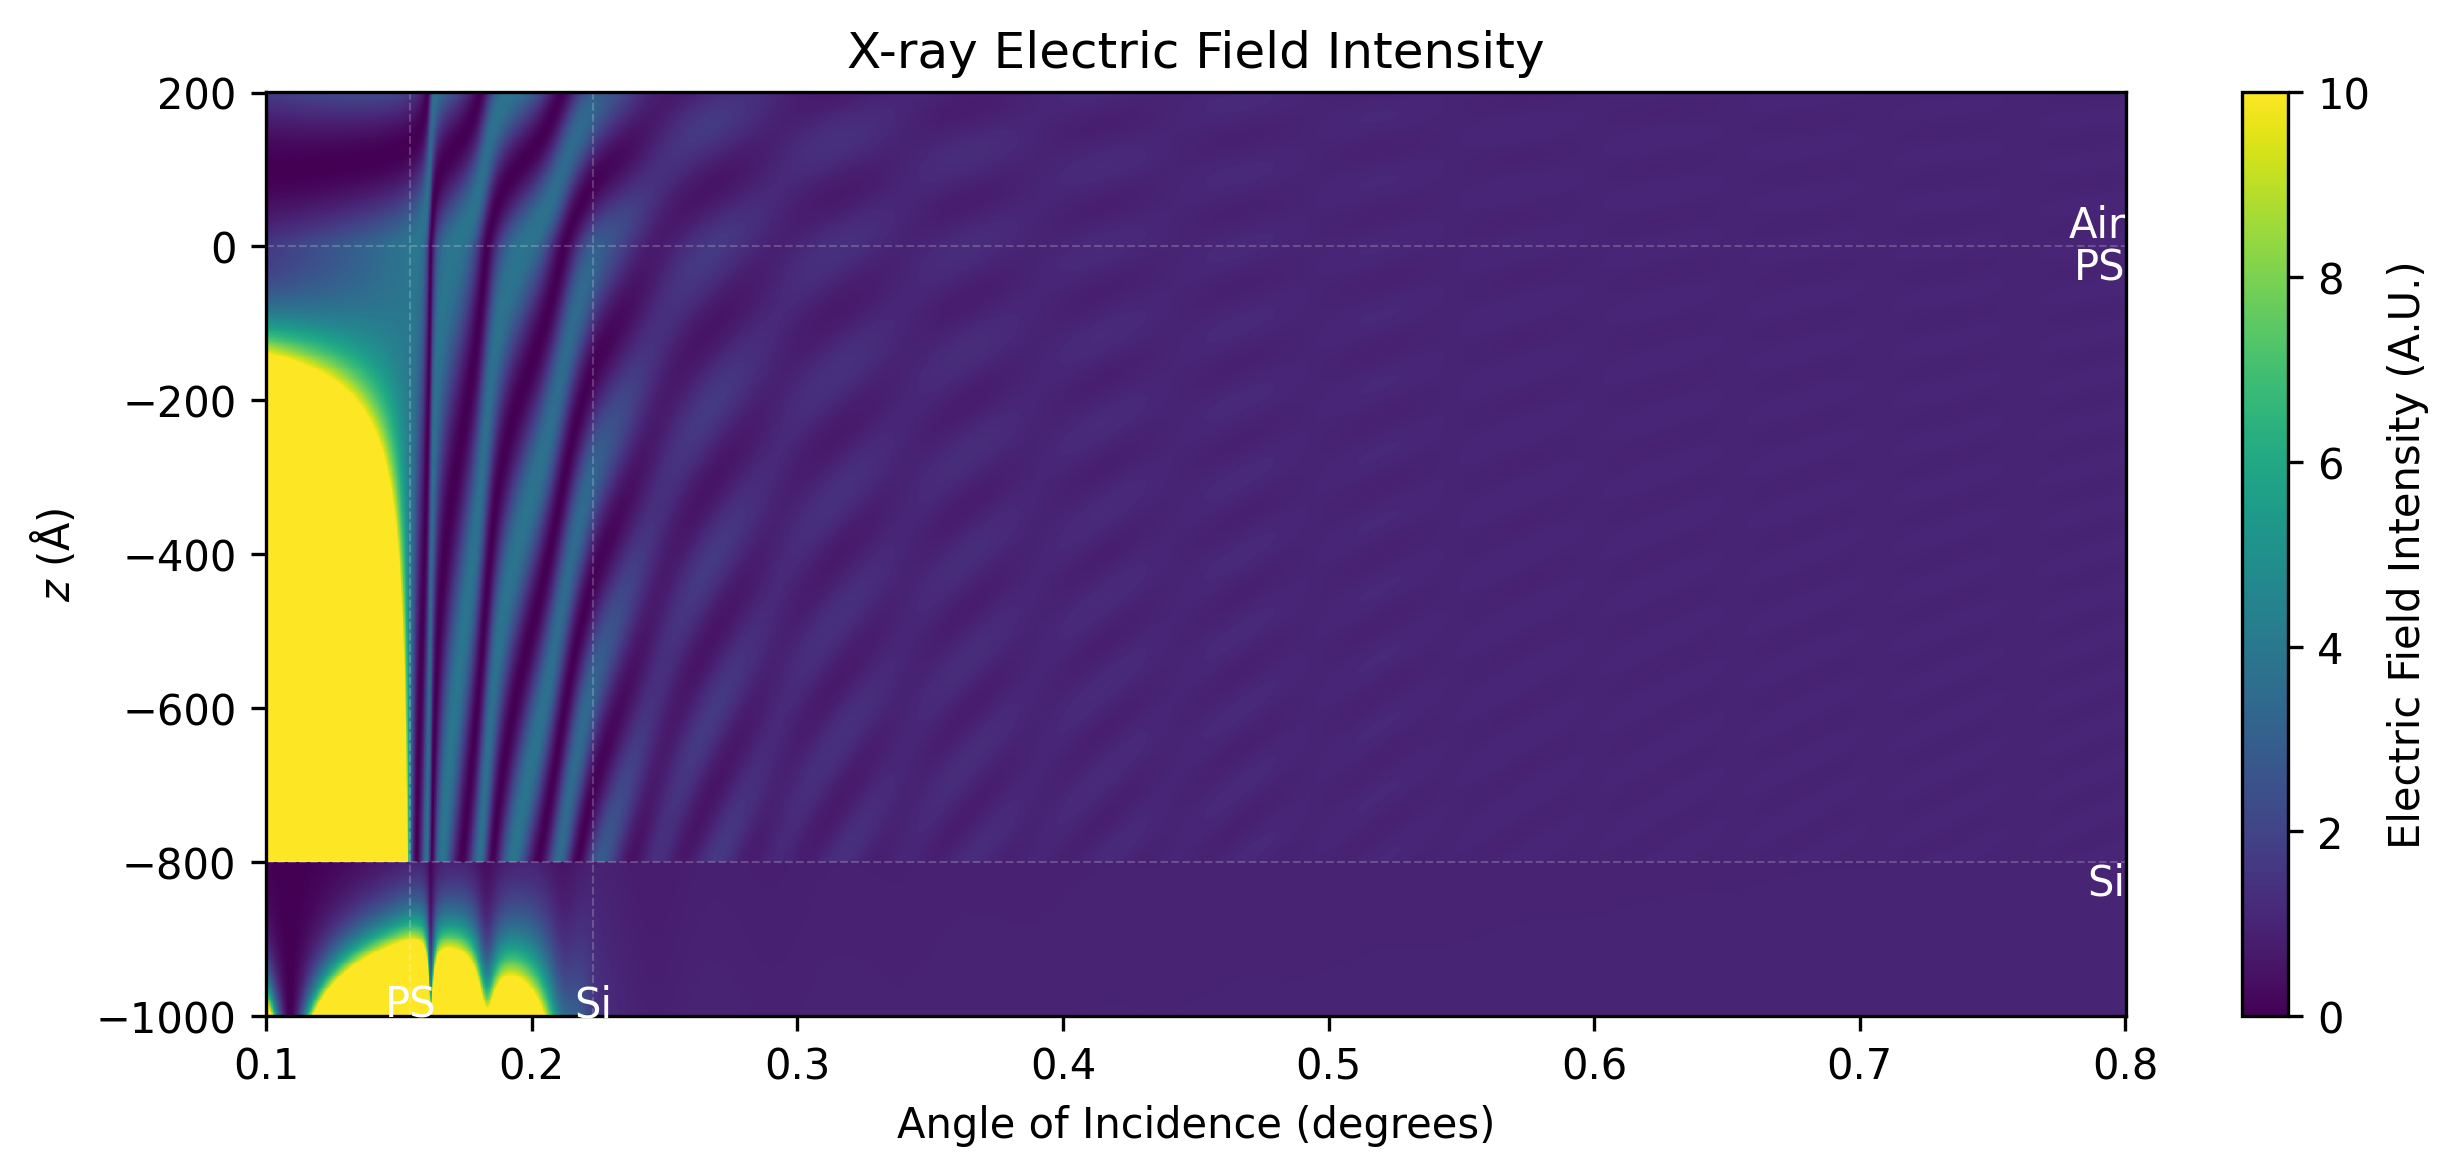

In [8]:
z_vals = np.linspace(200, -1000, 1000)
import matplotlib.colors as mc
# norm = mc.LogNorm(vmin=1e-6, vmax=10)
norm = mc.Normalize(vmin=0, vmax=10)
fig,ax = result2.generate_pretty_figure_XEFI(z_vals, norm=norm)

In [9]:
result3.T[500, 1], result3.R[500, 1]

(np.complex128(1.2671288246829087+0.17189278886378287j),
 np.complex128(-0.5245831466393811-0.9852443573033958j))

In [10]:
result3.T[500, 0], result3.R[500, 0]

(np.complex128(1+0j), np.complex128(-0.2574543219564723-0.813351568439613j))

T (3000, 3)
R (3000, 3)
(3000,)
complex128 float64
complex128
i:  0 
Transmission: [0.99999085+0.00427682j 0.99999081+0.0042868j  0.99999077+0.00429678j ...
 0.99941546+0.03418692j 0.99941512+0.03419689j 0.99941477+0.03420687j] 
Reflection: [-0.16403243-0.98527669j -0.16012296-0.98591484j -0.15620433-0.98653851j
 ...  0.01197414+0.0101122j   0.01168317+0.01016946j
  0.01139093+0.01021894j] 
Wave: [0.00712092+0.j 0.00713754+0.j 0.00715416+0.j ... 0.05693231+0.j
 0.05694893+0.j 0.05696555+0.j] 
d: [200.         175.97597598 151.95195195 127.92792793 103.9039039
  79.87987988  55.85585586  31.83183183   7.80780781] 
Phase: [[0.+1.42418427e+00j 0.+1.41563061e+00j 0.+1.40707695e+00j ...
  0.+2.13841481e-02j 0.+1.28304889e-02j 0.+4.27682963e-03j]
 [0.+1.42750847e+00j 0.+1.41893484e+00j 0.+1.41036122e+00j ...
  0.+2.14340611e-02j 0.+1.28604366e-02j 0.+4.28681222e-03j]
 [0.+1.43083267e+00j 0.+1.42223908e+00j 0.+1.41364549e+00j ...
  0.+2.14839740e-02j 0.+1.28903844e-02j 0.+4.29679480e-03j]
 ..

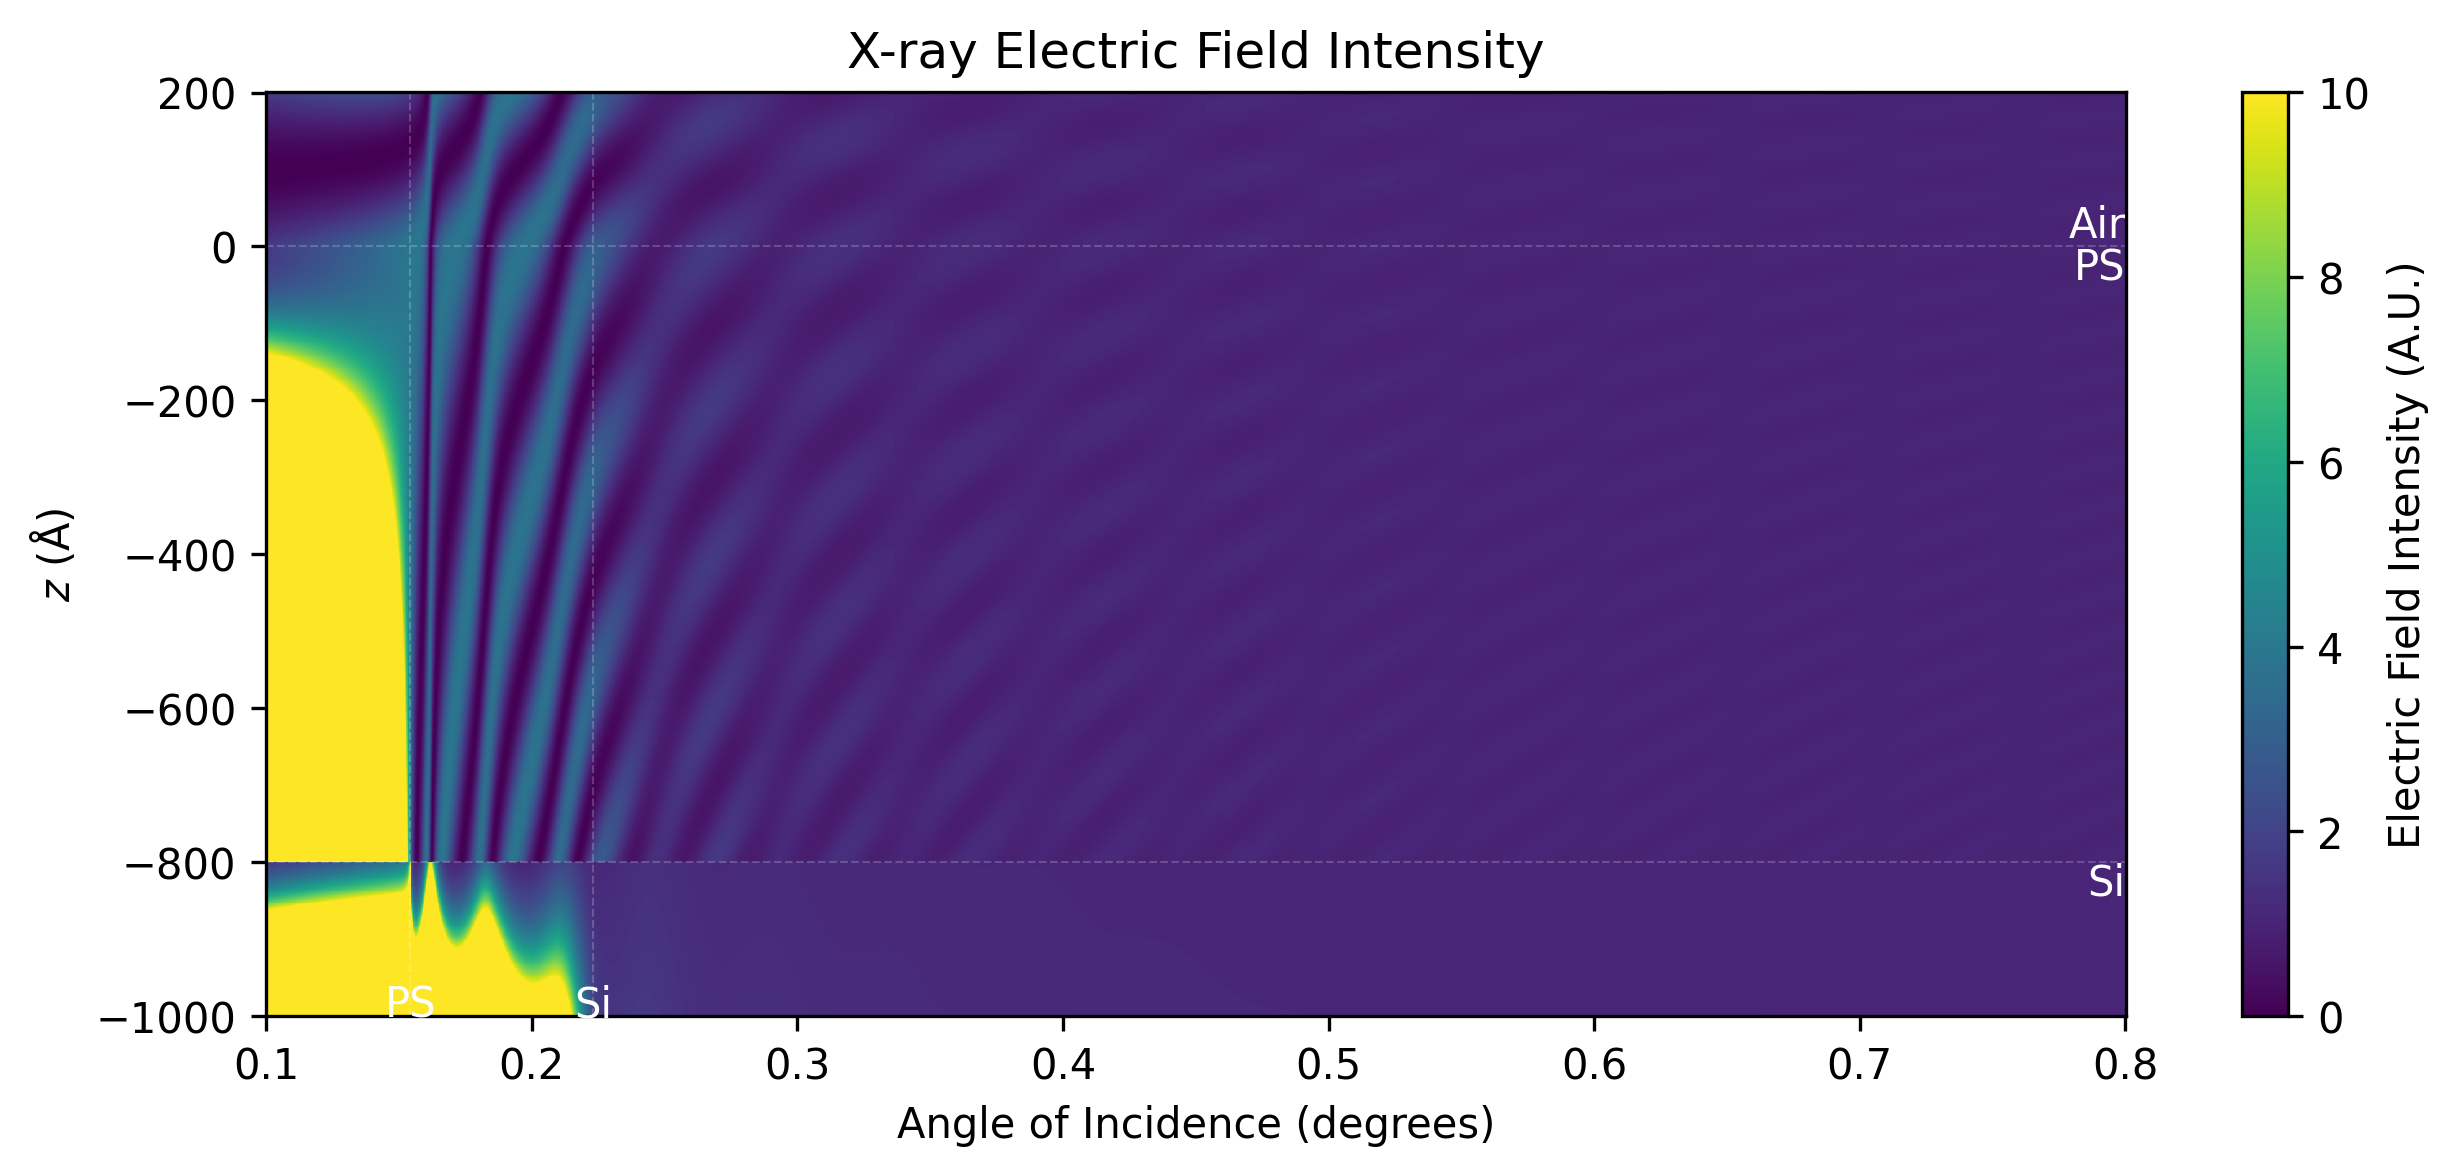

In [12]:
z_vals = np.linspace(200, -1000, 1000)
import matplotlib.colors as mc
# norm = mc.LogNorm(vmin=1e-6, vmax=10)
norm = mc.Normalize(vmin=0, vmax=10)
fig,ax = result3.generate_pretty_figure_XEFI(z_vals, norm=norm)